In [6]:
# Spectral clustering
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# ncut from https://github.com/jesolem/PCV/tree/master/PCV/tools
# Solem "Programming Computer Vision with Python"
import ncut
%matplotlib inline
#from scipy.misc import imresize

In [5]:

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

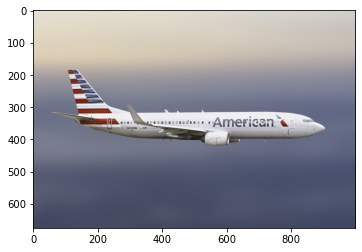

In [8]:

im = np.array(Image.open('airplane_segmentation.jpeg'))
plt.imshow(im)

(675, 1000)


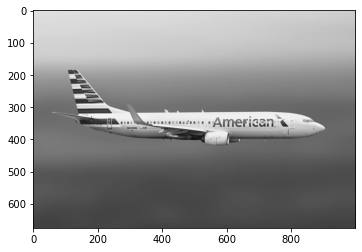

In [14]:
# convert to grayscale
im1 = rgb2gray(im)
print(im1.shape)
plt.imshow(im1,cmap='gray')

In [23]:

m,n = im1.shape[:2]
wid = 50
#rim = imresize(im1,(wid,wid),interp='bilinear')
# original size is large. Reduce for memory purposes
rim = Image.fromarray(im1)
rim=rim.resize(size=(wid, wid))
rim = np.array(rim,'f')

#plt.imshow(rim,cmap='gray')

A = ncut.ncut_graph_matrix(rim,sigma_d=1,sigma_g=1e-2)

# imresize no longer supported
#codeim = imresize(code.reshape(wid,wid),(wid,wid), interp='nearest')

#plt.imshow(codeim,cmap='gray')

[[1 2 2 ... 2 2 1]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 [1 1 1 ... 1 1 1]]


In [24]:
# cluster with k=3 clusters using kmeans
code, V = ncut.cluster(A,k=3,ndim=3)
code = code.reshape(wid,wid)


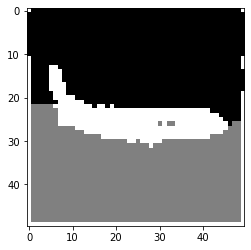

In [25]:
plt.imshow(code,cmap="gray")

In [ ]:
# Calculating the SVD
